<a href="https://colab.research.google.com/github/Masterjun12/supervised-classification/blob/main/lane_damaged_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터가 가장 적은 D 레이블 어그멘테이션

In [79]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import cv2

# 데이터 디렉토리 설정
data_dir = '/content/drive/MyDrive/albeled/'
label = 'D'  # 어그멘테이션을 적용할 레이블

# 이미지 데이터 불러오기
images = []
for filename in os.listdir(os.path.join(data_dir, label)):
    img = cv2.imread(os.path.join(data_dir, label, filename))
    img = cv2.resize(img, (224, 224))  # 이미지 크기 조정
    images.append(img)

# 이미지 데이터를 넘파이 배열로 변환
images = np.array(images)

# 데이터 어그멘테이션 설정
datagen = ImageDataGenerator(
    rotation_range=20,  # 무작위 회전 범위 설정
    width_shift_range=0.1,  # 가로 이동 범위 설정
    height_shift_range=0.1,  # 세로 이동 범위 설정
    horizontal_flip=True,  # 수평으로 뒤집기 설정
    vertical_flip=False,  # 수직으로 뒤집기 설정
    fill_mode='nearest'  # 이미지를 회전 또는 이동할 때 생기는 공간을 어떻게 채울지 설정
)

# 어그멘테이션된 이미지 수
num_augmented_images = 10

# 어그멘테이션된 이미지 저장할 디렉토리 설정
save_dir = '/content/drive/MyDrive/albeled/D'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 데이터 어그멘테이션 반복 수행 및 저장
for i in range(num_augmented_images):
    for j, img in enumerate(images):
        img = np.expand_dims(img, axis=0)
        augmented_img = datagen.flow(img, batch_size=1)[0][0]
        filename = f'{label}_augmented_{i}_{j}.jpg'  # 저장할 이미지의 파일 이름 설정
        cv2.imwrite(os.path.join(save_dir, filename), augmented_img)

# 생성된 어그멘테이션된 이미지의 수 확인
print("Number of augmented images:", num_augmented_images * len(images))


Number of augmented images: 1880


In [6]:
# 이미지 데이터 불러오기
def imgtonpy (data_dir , label):
    images = []
    for filename in os.listdir(os.path.join(data_dir, label)):
        img = cv2.imread(os.path.join(data_dir, label, filename))
        img = cv2.resize(img, (224, 224))  # 이미지 크기 조정
        images.append(img)

    # 이미지 데이터를 넘파이 배열로 변환
    images = np.array(images)
    return images

### 다른 레이블도 넘파이 화

In [2]:
data_dir = '/content/drive/MyDrive/albeled/'

# 이미지 데이터 불러오기
def load_images(data_dir , label):
    images = []
    for filename in os.listdir(os.path.join(data_dir, label)):
        img = cv2.imread(os.path.join(data_dir, label, filename))
        print(filename)
        img = cv2.resize(img, (224, 224))  # 이미지 크기 조정
        images.append(img)

    # 이미지 데이터를 넘파이 배열로 변환
    images = np.array(images)
    return images

# 이미지 데이터 로드
label_A = load_images(data_dir, 'A')
label_B = load_images(data_dir, 'B')
label_C = load_images(data_dir, 'C')
label_D = load_images(data_dir, 'D')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Liniya 1id420_6969.png
Liniya 1id420_6970.png
Liniya 1id420_6971.png
Liniya 1id420_6972.png
Liniya 1id420_6973.png
Liniya 1id420_6975.png
Liniya 1id420_6977.png
Liniya 1id420_6979.png
Liniya 1id420_6981.png
Liniya 1id420_6983.png
Liniya 1id420_6985.png
Liniya 1id420_6987.png
Liniya 1id420_6989.png
Liniya 1id420_6991.png
Liniya 1id420_6993.png
Liniya 1id420_6995.png
Liniya 1id420_6997.png
Liniya 1id420_6999.png
Liniya 1id420_7002.png
Liniya 1id420_7005.png
Liniya 1id422_7026.png
Liniya 1id422_7027.png
Liniya 1id422_7028.png
Liniya 1id425_7055.png
Liniya 1id425_7057.png
Liniya 1id425_7059.png
Liniya 1id425_7061.png
Liniya 1id425_7063.png
Liniya 1id425_7065.png
Liniya 1id425_7067.png
Liniya 1id425_7069.png
Liniya 1id425_7071.png
Liniya 1id425_7073.png
Liniya 1id424_7099.png
Liniya 1id424_7101.png
Liniya 1id424_7103.png
Liniya 1id424_7105.png
Liniya 1id424_7107.png
Liniya 1id424_7109.png
Liniya 1id424_7111.png
Liniya 1id424_7113.png
Liniya 1id424_7115.pn

In [57]:
# npy 파일로 저장
np.save('label_A.npy', label_A)
np.save('label_B.npy', label_B)
np.save('label_C.npy', label_C)
np.save('label_D.npy', label_D)

### OTSU 와 CANNY 채널을 추가

In [81]:
import cv2
import numpy as np
import os

def apply_otsu(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 이미지를 그레이스케일로 변환
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # OTSU 변환 수행
    return thresh

def apply_canny(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 이미지를 그레이스케일로 변환
    edges = cv2.Canny(gray, 100, 200)  # CANNY 엣지 검출 수행
    return edges

In [73]:
def preprocess_images(data_dir, output_dir):
    label = ['A', 'B', 'C', 'D']
    for label in label:
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            output_label_dir = os.path.join(output_dir, label)
            if not os.path.exists(output_label_dir):
                os.makedirs(output_label_dir)

            for filename in os.listdir(os.path.join(data_dir, label)):
                img = cv2.imread(os.path.join(data_dir, label, filename))
                print(filename)
                img = cv2.resize(img, (224, 224))  # 이미지 크기 조정

                # 이미지 전처리 작업 수행
                preprocessed_img = apply_canny(img)

                # 전처리된 이미지 저장
                output_img_path = os.path.join(output_label_dir, filename)
                cv2.imwrite(output_img_path, preprocessed_img)


data_dir = '/content/drive/MyDrive/albeled/'
output_dir = '/content/drive/MyDrive/processed_images_canny/'


preprocess_images(data_dir, output_dir)

Liniya 1id5_95.png
Liniya 1id5_71.png
Liniya 1id10_258.png
Liniya 1id10_265.png
Liniya 1id10_262.png
Liniya 1id8_257.png
Liniya 1id8_253.png
Liniya 1id8_261.png
Liniya 1id27_434.png
Liniya 1id27_440.png
Liniya 1id24_427.png
Liniya 1id8_215.png
Liniya 1id15_356.png
Liniya 1id15_372.png
Liniya 1id15_360.png
Liniya 1id15_364.png
Liniya 1id15_368.png
Liniya 1id7_153.png
Liniya 1id7_148.png
Liniya 1id7_143.png
Liniya 1id7_137.png
Liniya 1id7_158.png
Liniya 1id468_8403.png
Liniya 1id8_205.png
Liniya 1id7_199.png
Liniya 1id468_8402.png
Liniya 1id8_210.png
Liniya 1id5_105.png
Liniya 1id5_90.png
Liniya 1id5_100.png
Liniya 1id15_352.png
Liniya 1id8_231.png
Liniya 1id8_249.png
Liniya 1id7_187.png
Liniya 1id8_227.png
Liniya 1id7_193.png
Liniya 1id7_169.png
Liniya 1id27_510.png
Liniya 1id7_181.png
Liniya 1id27_504.png
Liniya 1id22_500.png
Liniya 1id7_175.png
Liniya 1id27_492.png
Liniya 1id7_163.png
Liniya 1id7_126.png
Liniya 1id5_116.png
Liniya 1id15_320.png
Liniya 1id5_66.png
Liniya 1id18_313.png


In [4]:
import matplotlib.pyplot as plt # 이미지 시각화
def imgprint(variable):
    images = variable[:5]

    fig, axes = plt.subplots(1, 5, figsize=(15, 3))

    for i, image in enumerate(images):
        axes[i].imshow(image)
        axes[i].axis('off')

    plt.show()

- RGB 이미지로 되어있는 3채널 영상처리 텐서를 1차원 흑백으로 변환해야 함

In [ ]:
# RGB 이미지를 그레이스케일로 변환
def rgb_to_gray(rgb_img):
    gray_img = np.dot(rgb_img[...,:3], [0.2989, 0.5870, 0.1140])
    return gray_img.astype(np.uint8)

In [59]:
label = ['A', 'B', 'C', 'D']
processed_data_otsu = {}

for i in label:
    variable_name = 'label_' + i + '_otsu'
    data_dir = '/content/drive/MyDrive/processed_images'
    processed_data_otsu[variable_name] = imgtonpy(data_dir, i)
    globals()[variable_name] = processed_data_otsu[variable_name]
    processed_data_otsu[variable_name] = rgb_to_gray(processed_data_otsu[variable_name])
    processed_data_otsu[variable_name] = processed_data_otsu[variable_name].squeeze() # 흑백 데이터

for variable_name, array in processed_data_otsu.items():
    print(f"{variable_name}: {array.shape}")


label_A_otsu: (326, 224, 224)
label_B_otsu: (788, 224, 224)
label_C_otsu: (188, 224, 224)
label_D_otsu: (315, 224, 224)


In [43]:
label_test.shape


(326, 224, 224, 3)

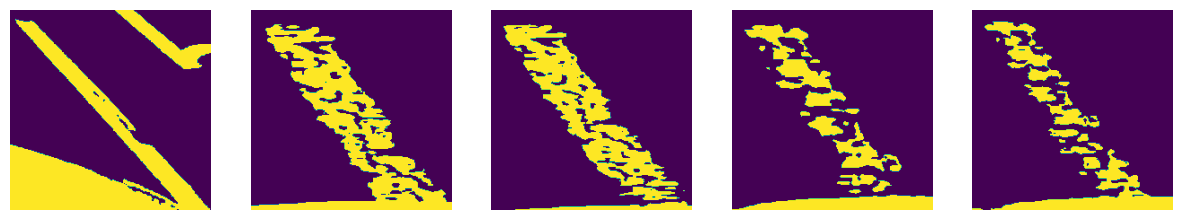

In [56]:
imgprint(processed_data_otsu['label_D_otsu'])

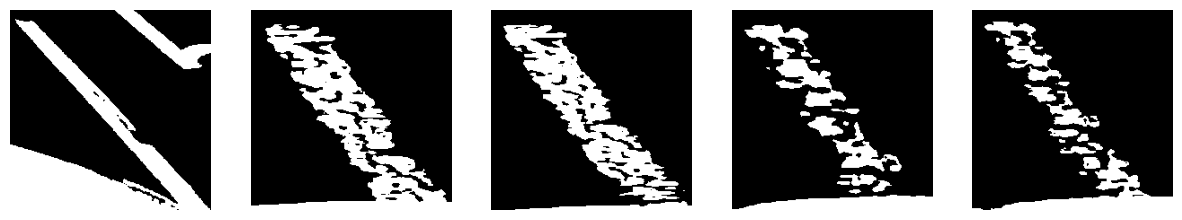

In [20]:
imgprint(label_D_otsu)

In [60]:
label = ['A', 'B', 'C', 'D']
processed_data_canny = {}

for i in label:
    variable_name = 'label_' + i + '_canny'
    data_dir = '/content/drive/MyDrive/processed_images'
    processed_data_canny[variable_name] = imgtonpy(data_dir, i)
    globals()[variable_name] = processed_data_canny[variable_name]
    processed_data_canny[variable_name] = rgb_to_gray(processed_data_canny[variable_name])
    processed_data_canny[variable_name] = processed_data_canny[variable_name].squeeze()

for variable_name, array in processed_data_canny.items():
    print(f"{variable_name}: {array.shape}")


label_A_canny: (326, 224, 224)
label_B_canny: (788, 224, 224)
label_C_canny: (188, 224, 224)
label_D_canny: (315, 224, 224)


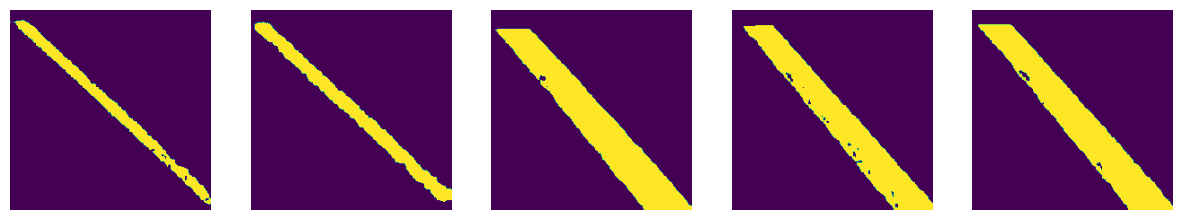

In [82]:
imgprint(processed_data_canny['label_A_canny'])

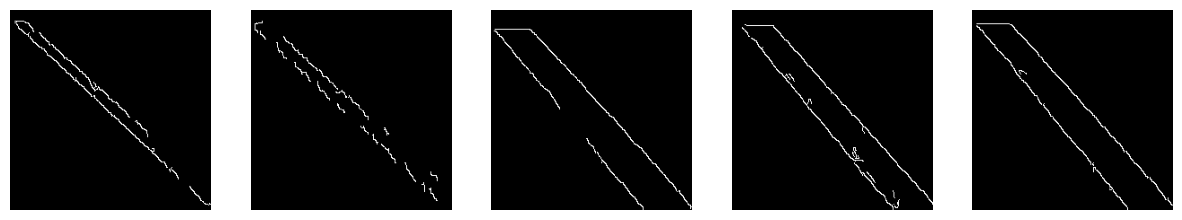

In [22]:
imgprint(label_A_canny)

### 전부다 컨케트네이트 (5개의 채널 > RGB(3), OTSU(1), CANNY(1)

In [72]:
# concatenate 함수 정의
def concatenate(label, label_otsu, label_canny):
    # 채널이 없는 텐서에 채널을 추가하기 위해 차원을 확장
    label_otsu_expanded = np.expand_dims(label_otsu, axis=-1)
    label_canny_expanded = np.expand_dims(label_canny, axis=-1)

    # label_otsu와 label_canny를 label 텐서 뒤로 연결
    concatenated_array = np.concatenate((label, label_otsu_expanded, label_canny_expanded), axis=-1)
    return concatenated_array

label = ['A', 'B', 'C', 'D']
processed_data = {}

for i in label:
    label_array = globals()['label_' + i]
    label_otsu_array = processed_data_otsu['label_' + i + '_otsu']
    label_canny_array = processed_data_canny['label_' + i + '_canny']

    variable_name = 'full_labeled_' + i
    processed_data[variable_name] = concatenate(label_array, label_otsu_array, label_canny_array)

for variable_name, array in processed_data.items():
    print(f"{variable_name}: {array.shape}")


full_labeled_A: (326, 224, 224, 5)
full_labeled_B: (788, 224, 224, 5)
full_labeled_C: (188, 224, 224, 5)
full_labeled_D: (315, 224, 224, 5)


In [76]:
A = processed_data["full_labeled_A"]
B = processed_data["full_labeled_B"]
C = processed_data["full_labeled_C"]
D = processed_data["full_labeled_D"]

## CNN 학습

### 데이터 전처리

In [77]:
from sklearn.model_selection import train_test_split

# 레이블 생성
y_A = np.zeros((A.shape[0],), dtype=int)
y_B = np.ones((B.shape[0],), dtype=int)
y_C = np.full((C.shape[0],), 2, dtype=int)
y_D = np.full((D.shape[0],), 3, dtype=int)

# 컨케트네이트
X = np.concatenate((A, B, C, D), axis=0)
y = np.concatenate((y_A, y_B, y_C, y_D), axis=0)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("훈련 세트 X:", X_train.shape)
print("검증 세트 X:", X_val.shape)
print("테스트 세트 X:", X_test.shape)
print("훈련 세트 y:", y_train.shape)
print("검증 세트 y:", y_val.shape)
print("테스트 세트 y:", y_test.shape)


훈련 세트 X: (970, 224, 224, 5)
검증 세트 X: (323, 224, 224, 5)
테스트 세트 X: (324, 224, 224, 5)
훈련 세트 y: (970,)
검증 세트 y: (323,)
테스트 세트 y: (324,)


In [80]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

def vgg_net(input_shape=(224, 224, 5)):

    input_layer = Input(shape=input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(input_layer)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)


    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    output_layer = Dense(1000, activation='softmax', name='predictions')(x)

    model = Model(input_layer, output_layer, name='vgg16')
    return model

vgg_model = vgg_net(input_shape=(224, 224, 5))

vgg_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 5)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      2944      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [85]:
vgg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = vgg_model.fit(X_train, y_train, epochs=80, batch_size=16)


Epoch 1/80
61/61 [==============================] - 13s 140ms/step - loss: 0.2082 - accuracy: 0.9660
Epoch 2/80
61/61 [==============================] - 9s 140ms/step - loss: 0.0410 - accuracy: 0.9928
Epoch 3/80
61/61 [==============================] - 9s 140ms/step - loss: 0.1638 - accuracy: 0.9454
Epoch 4/80
61/61 [==============================] - 8s 139ms/step - loss: 0.0935 - accuracy: 0.9660
Epoch 5/80
61/61 [==============================] - 8s 139ms/step - loss: 0.3915 - accuracy: 0.8990
Epoch 6/80
61/61 [==============================] - 8s 139ms/step - loss: 1.3497 - accuracy: 0.5866
Epoch 7/80
61/61 [==============================] - 8s 139ms/step - loss: 0.9327 - accuracy: 0.6619
Epoch 8/80
61/61 [==============================] - 8s 139ms/step - loss: 0.8851 - accuracy: 0.6969
Epoch 9/80
61/61 [==============================] - 8s 139ms/step - loss: 0.6593 - accuracy: 0.7340
Epoch 10/80
61/61 [==============================] - 8s 139ms/step - loss: 0.4232 - accuracy: 0.833

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = vgg_model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='macro')
recall = recall_score(y_test, y_pred_classes, average='macro')
f1 = f1_score(y_test, y_pred_classes, average='macro')

print("정확도:", accuracy)
print("정밀도:", precision)
print("재현율:", recall)
print("F1 Score:", f1)

11/11 [==============================] - 1s 88ms/step
정확도: 0.8364197530864198
정밀도: 0.8471590880249339
재현율: 0.8281816732510032
F1 Score: 0.8369645381801222


In [89]:
y_pred_classes

array([3, 0, 1, 3, 1, 2, 2, 3, 1, 1, 0, 3, 1, 1, 3, 2, 1, 1, 3, 1, 1, 2,
       0, 3, 1, 2, 3, 0, 2, 0, 2, 0, 2, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1,
       0, 1, 3, 3, 1, 1, 0, 1, 0, 0, 1, 3, 3, 3, 3, 1, 3, 2, 3, 1, 2, 0,
       1, 0, 0, 1, 1, 3, 0, 0, 1, 0, 3, 0, 3, 1, 1, 0, 3, 3, 1, 0, 1, 3,
       0, 1, 2, 1, 3, 1, 1, 0, 0, 0, 1, 1, 0, 1, 3, 1, 2, 3, 0, 0, 2, 0,
       1, 1, 0, 1, 0, 3, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 3, 3, 3,
       1, 3, 1, 1, 3, 0, 1, 1, 1, 0, 1, 1, 3, 1, 2, 1, 3, 1, 2, 0, 0, 0,
       1, 0, 1, 3, 1, 2, 1, 3, 1, 2, 1, 1, 0, 3, 1, 3, 0, 1, 0, 3, 0, 0,
       2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 0, 3, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 0, 1, 1, 2, 1, 1,
       3, 0, 0, 1, 1, 3, 2, 1, 1, 1, 1, 3, 3, 3, 2, 0, 3, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 3, 1, 0, 2, 1,
       3, 2, 0, 3, 1, 1, 1, 1, 1, 3, 2, 1, 0, 1, 1,

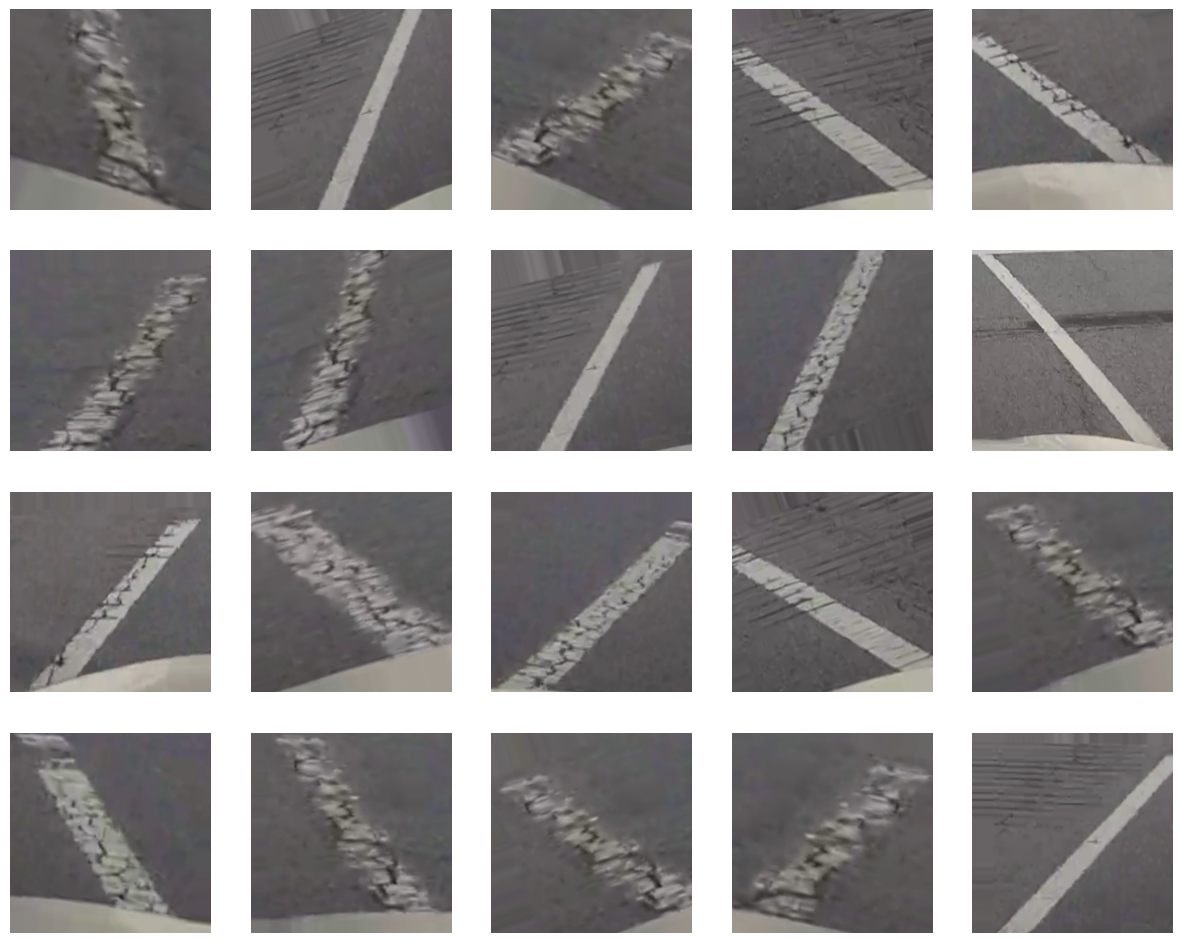

In [97]:
D_label_index = 3
D_indices = np.where(y_pred_classes == D_label_index)[0]

num_images_to_visualize = 20
num_cols = 5
num_rows = num_images_to_visualize // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

for i, idx in enumerate(D_indices[:num_images_to_visualize]):
    row = i // num_cols
    col = i % num_cols
    image = X_test[idx][:, :, :3]  # RGB 만 가져오기
    axes[row, col].imshow(image)
    axes[row, col].axis('off')

plt.show()
